# Gapminder

Here, we explore the Gapminder dataset on world health and economics to answer the following two questions.

1. Is it fair to say the world is divided into rich and poor?
2. Has income inequality worsened during the last 40 years?

## Load dependencies

In [121]:
library(dslabs)
library(ggplot2)
library(dplyr)
library(stats)
library(gridExtra)
data(gapminder)

In [3]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [13]:
str(gapminder)

'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


## Utility functions

In [72]:
randomColors = function(numberOfColors = 1) {
    # Return a vector containing a number of random colors, all in "#rrggbb" format
    
    cols = c() # empty vector of colors
    for (i in 1:numberOfColors) {
        r = as.character(as.hexmode(sample(0:255, 1))) # amount of red
        if (nchar(r) == 1) r = paste("0", r, sep = "")
        
        g = as.character(as.hexmode(sample(0:255, 1))) # amount of green
        if (nchar(g) == 1) r = paste("0", r, sep = "")
        
        b = as.character(as.hexmode(sample(0:255, 1))) # amount of blue
        if (nchar(b) == 1) r = paste("0", r, sep = "")
        
        col = paste("#", r,g,b, sep="") # current random color
        
        if (nchar(col) != 7) col = "#ff0000" # safe side
        
        cols = append(cols, col) # append the current color to the list of colors
    }
    cols
}

## Plottings

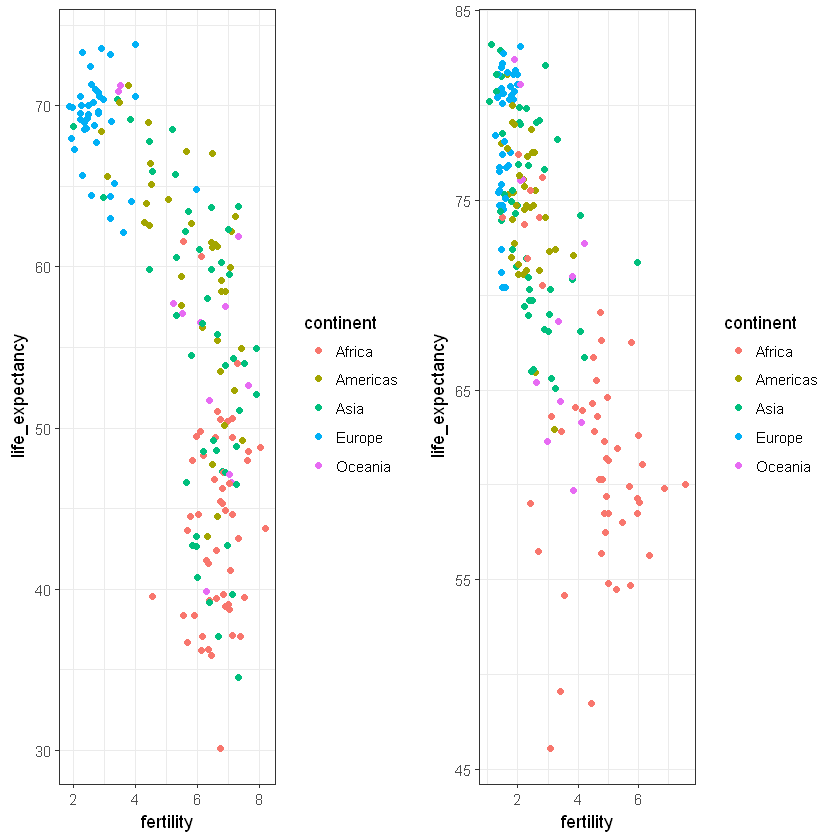

In [20]:
# Draw a scatter-plot b/w fertility rates and life expectancy in the year 1962 and 2012
ds_theme_set()
plt62 = gapminder %>% filter(year == 1962) %>% ggplot(aes(fertility, life_expectancy, color=continent)) + geom_point()
plt16 = gapminder %>% filter(year == 2012) %>% ggplot(aes(fertility, life_expectancy, color=continent)) + geom_point()
grid.arrange(plt62, plt16, ncol=2)

## Faceting

Faceting can be done using `facet_grid` or `facet_wrap` function.

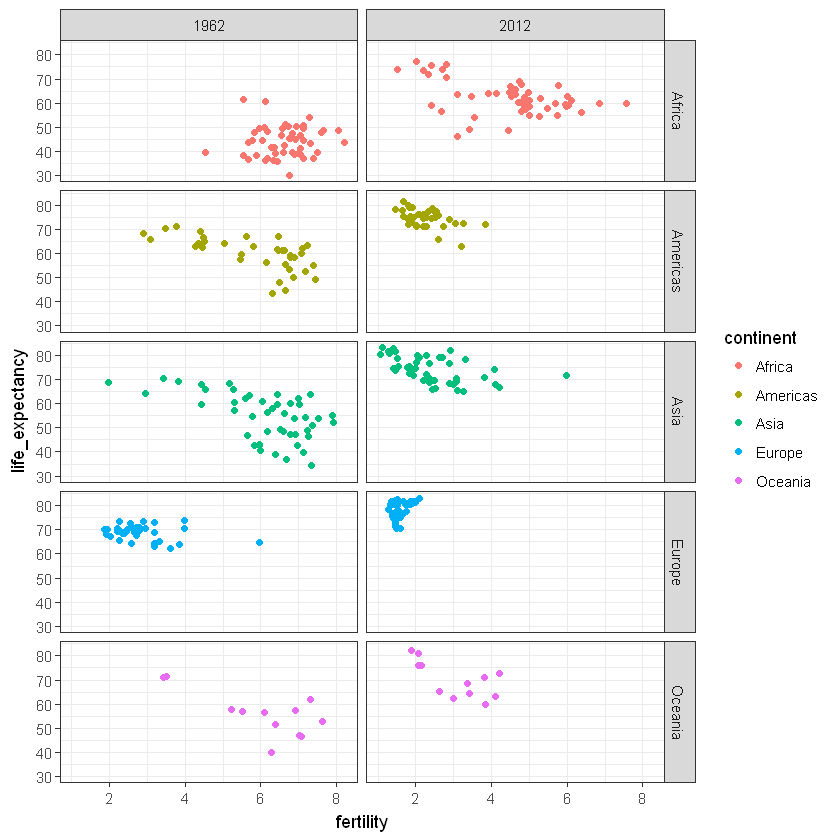

In [26]:
# Create the same plot, but for the years 1962 and 2012
plt = gapminder %>% filter(year %in% c(1962, 2012)) %>% ggplot(aes(fertility, life_expectancy, color=continent)) + geom_point()

# Add a facet layer with continent as rows and year as columns
plt = plt + facet_grid(continent~year) 

plt

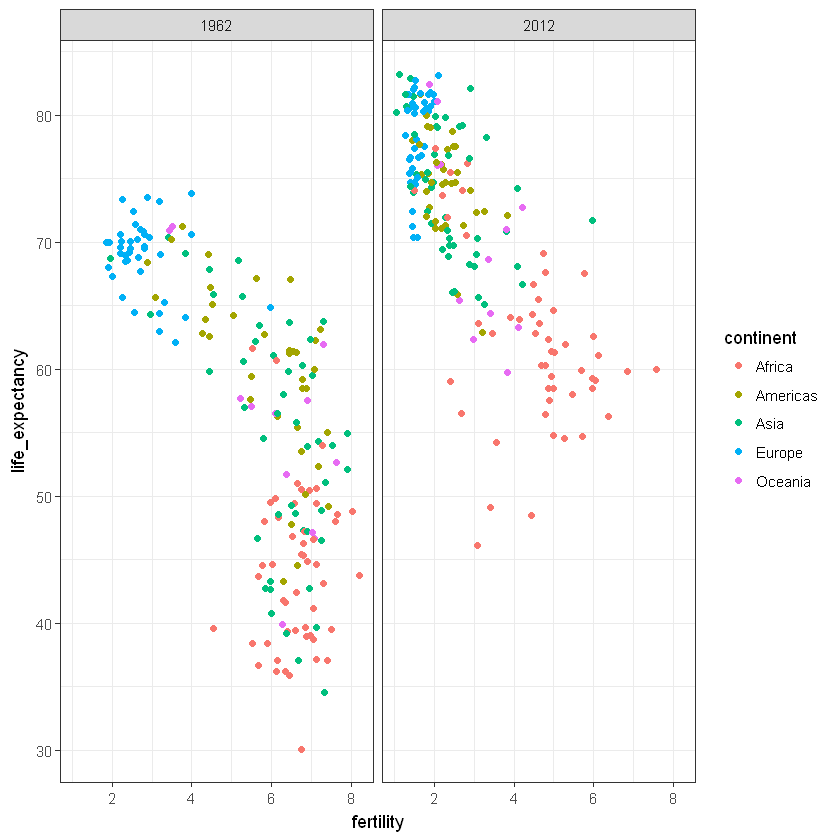

In [28]:
# replace continent by dot (.) to show only the yearly comparison w/ continent separated by colors
plt = plt + facet_grid(.~year) 
plt

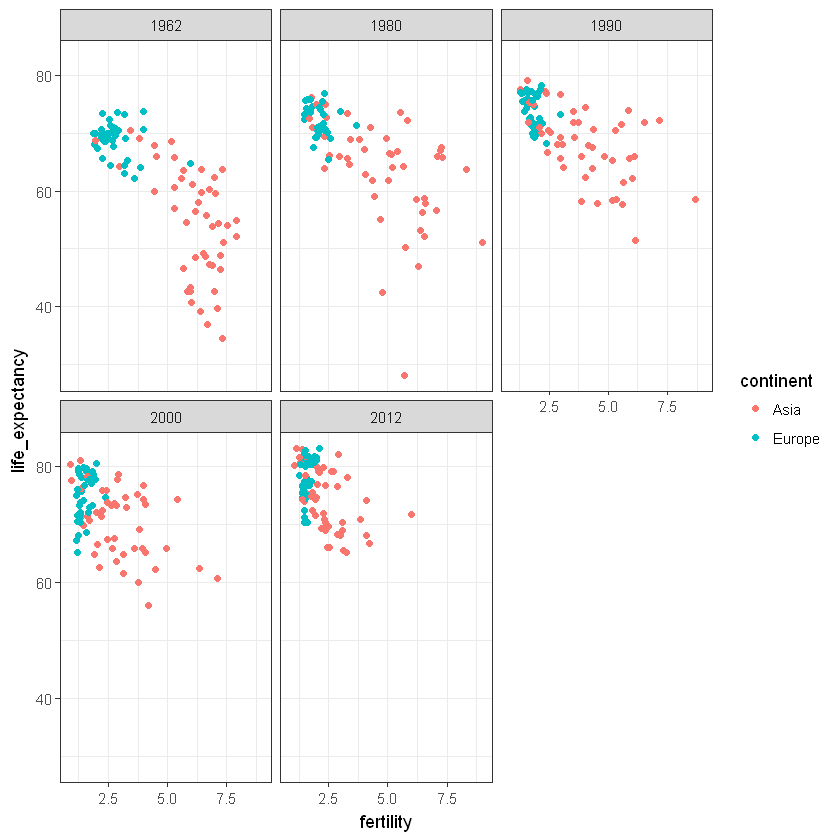

In [33]:
# Compare Asia and Europe for 5 years, and wrap around the visualization using facet_wrap()
years = c(1962, 1980, 1990, 2000, 2012)
continents = c("Asia", "Europe")
plt = gapminder %>% filter(year %in% years, continent %in% continents)
plt = plt %>% ggplot (aes(fertility, life_expectancy, color=continent)) + geom_point() + facet_wrap(~year)
plt

## Time-Series Plot

They are drawn by adding a `geom_line` layer and providing it with a suitable label.

Warning message:
"Removed 6 rows containing missing values (geom_path)."

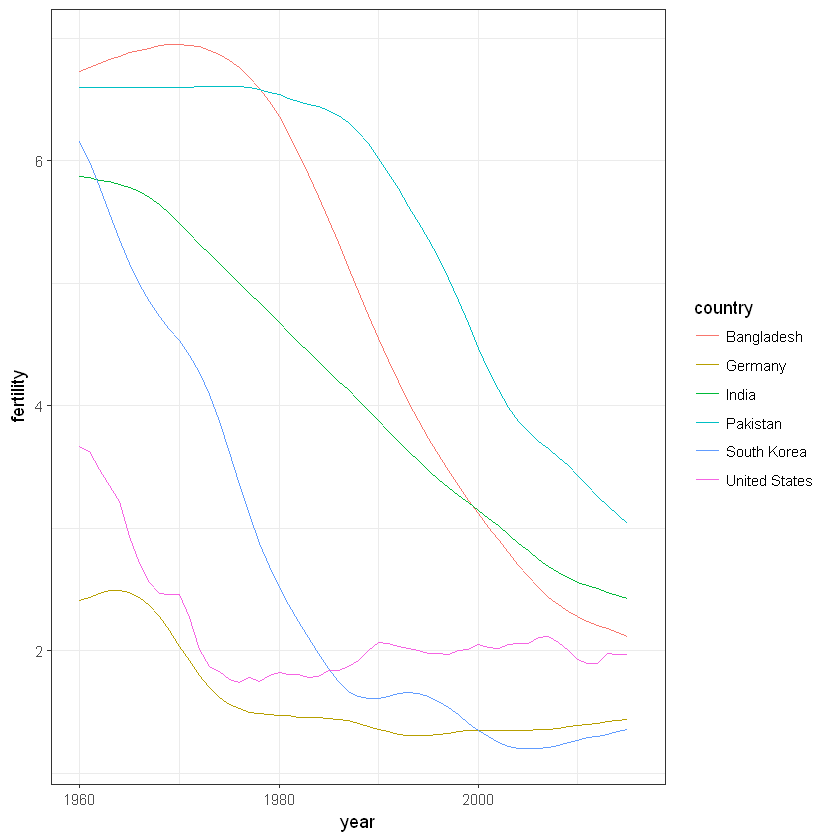

In [56]:
# Draw a time-series plot for a few countries with fertility
plt = gapminder %>% filter(country %in% c("Germany", "South Korea", "India", "United States", "Bangladesh", "Pakistan"))
plt = plt %>% ggplot (aes(year, fertility, color = country, label = country))
plt = plt + geom_line() # this draws the time-series plot
# plt = plt + geom_text(aes(x = c(1975, 1980, 1985, 1990, 1995), y = c(60, 62, 64, 66, 68)), size = 5) #+ theme(legend.position = "none")
plt

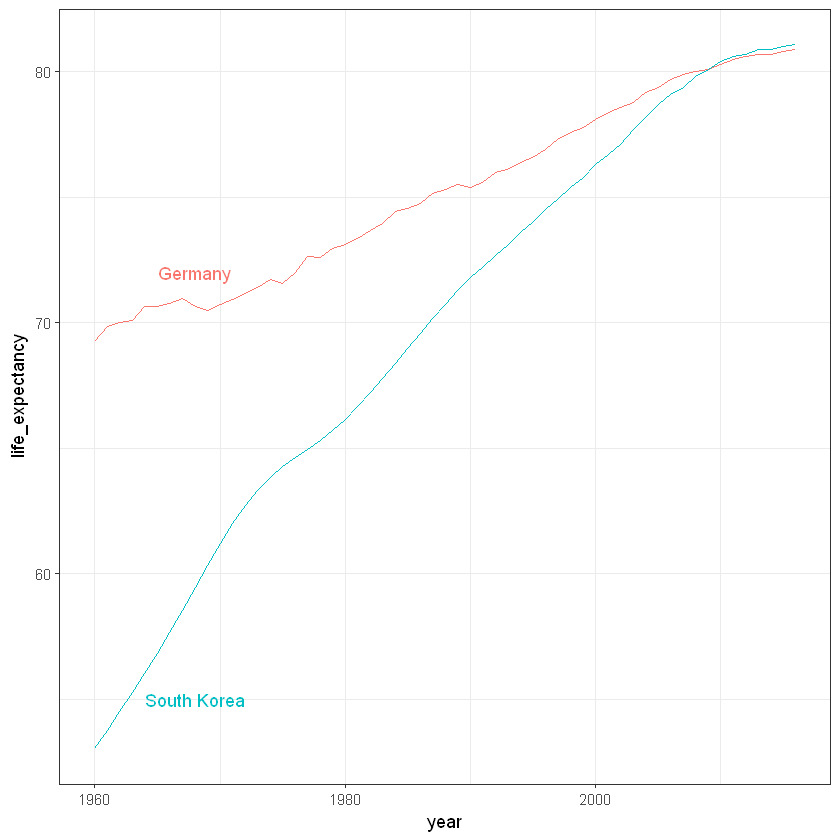

In [70]:
# Create the time-series plot for Germany and South Korea w/ life expectancy and labels
countries = c("Germany", "South Korea")
labels = data.frame(country = countries, x = c(1968, 1968), y = c(72, 55))
plt = gapminder %>% filter(country %in% countries)
plt = plt %>% ggplot (aes(year, life_expectancy, color = country)) + geom_line()
plt = plt + geom_text(data = labels, aes(x, y, label = country)) # add the label
plt = plt + theme(legend.position = "none") # remove the legend
plt

# Transformations

In [127]:
# Add a dollars-per-day attribute to the gapminder table
gapminder = mutate(gapminder, dollars_per_day = gdp / population / 365)
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,dollars_per_day
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe,NA
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa,3.405458
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa,NA
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean,NA
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America,14.393153
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia,NA


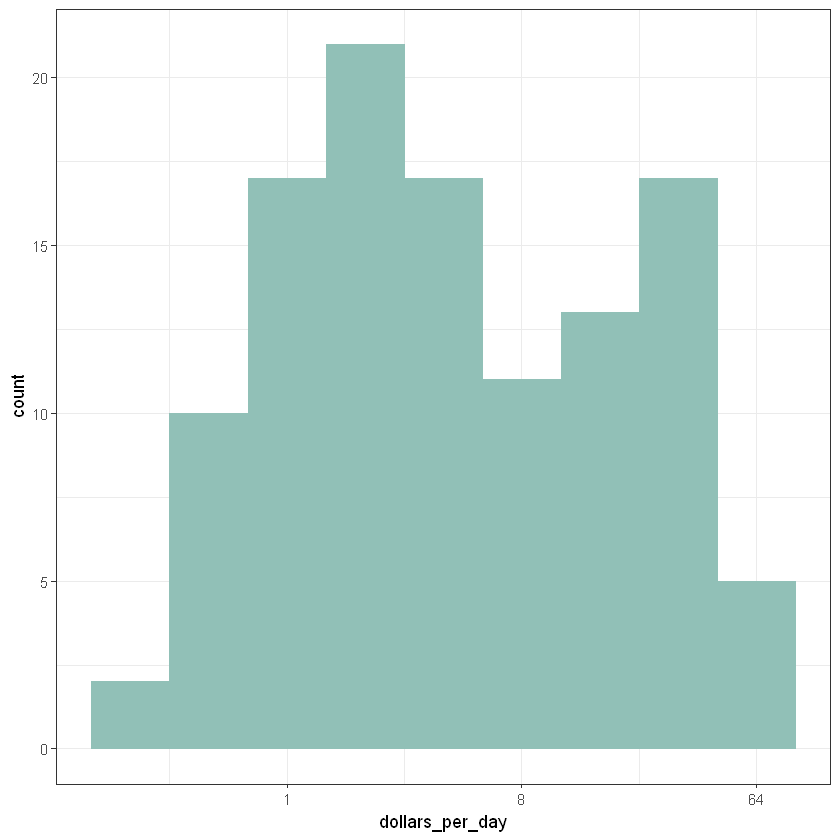

In [128]:
# Draw a histogram from the year 1970
col = randomColors(1)
hist = gapminder %>% filter (year == 1970 & !is.na(gdp)) # removed NA's from GDP
hist = hist %>% ggplot (aes(dollars_per_day)) + geom_histogram(binwidth = 1, color = col, fill = col)
hist = hist + scale_x_continuous(trans = "log2") # Transformation
hist

## Stratify and Boxplot

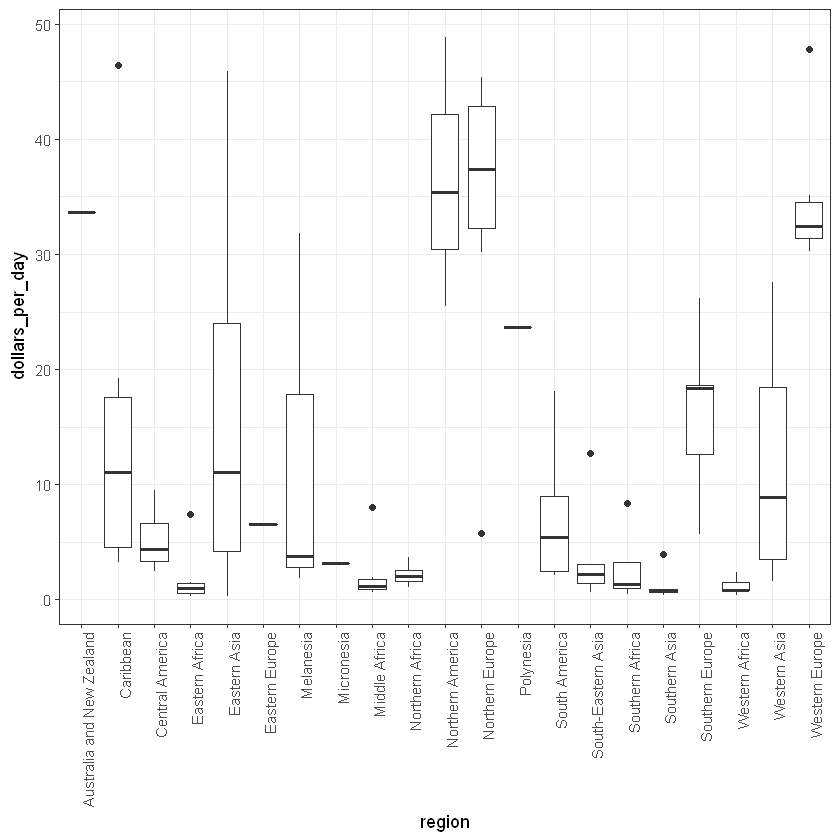

In [129]:
# Draw a boxplot from the year 1970
box = gapminder %>% filter (year == 1970 & !is.na(gdp)) # removed NA's from GDP
box = box %>% ggplot (aes(region, dollars_per_day)) + geom_boxplot()
box = box + theme(axis.text.x = element_text(hjust = 1, angle = 90)) # make the labels horizontal
box

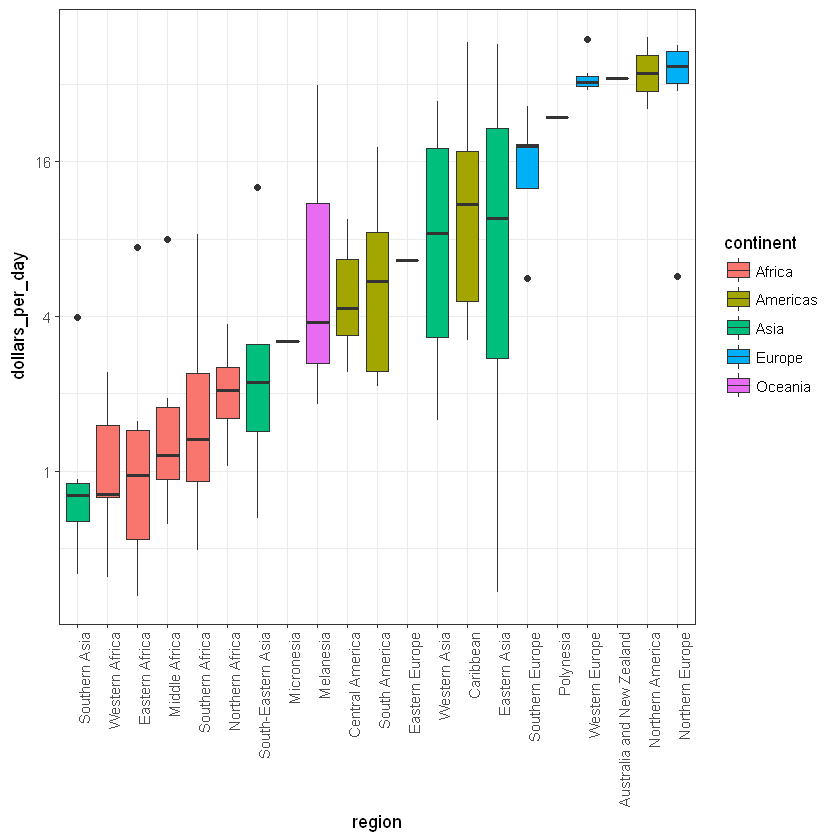

In [132]:
# Reorder each region according the median of its of dollars per day
box = gapminder %>% filter (year == 1970 & !is.na(gdp))
box = box %>% mutate(region = reorder(region, dollars_per_day, FUN = median)) # reorder here
box = box %>% ggplot (aes(region, dollars_per_day, fill = continent)) # also, add a color
box = box + geom_boxplot() + theme(axis.text.x = element_text(hjust = 1, angle = 90))
box = box + scale_y_continuous(trans = "log2")
box

## Compare Distributions

Compare income distributions for the west and developing countries in the years 1970 and 2010 through histograms and boxplots.

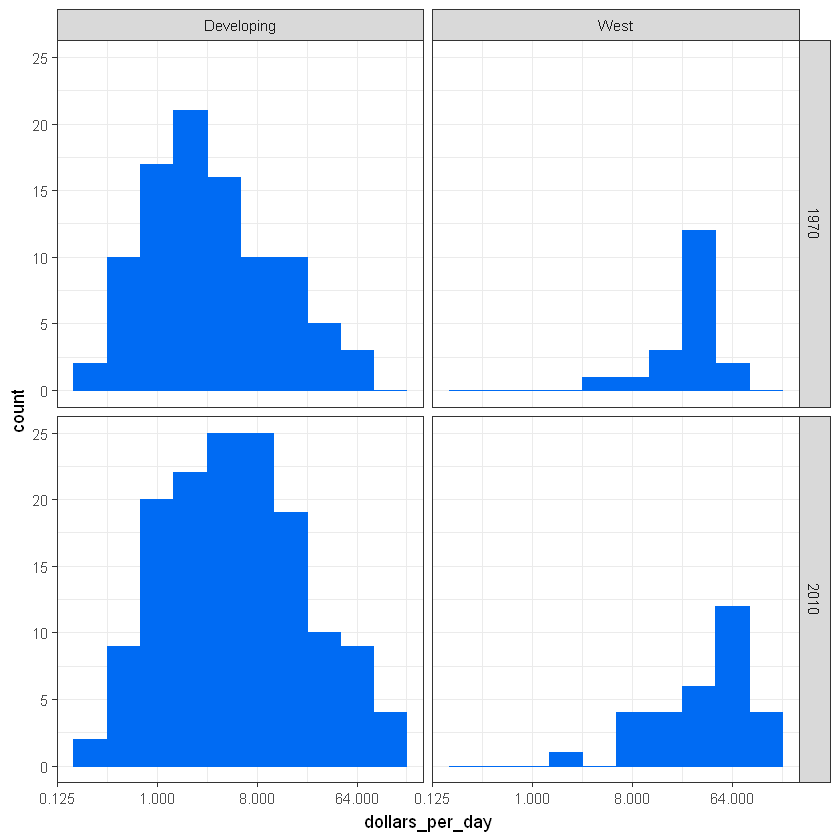

In [150]:
# helping variables
west = c("Western Europe", "Northern Europe", "Southern Europe", "North America", "Australia and New Zealand")
col = randomColors(1)

hist = gapminder %>% filter(year %in% c(1970, 2010) & !is.na(gdp))

# add a group attribute for western countries and rest of the world
hist = hist %>% mutate(group = ifelse(region %in% west, "West", "Developing"))

hist = hist %>% ggplot (aes(dollars_per_day)) + geom_histogram(binwidth = 1, color = col, fill = col) 
hist = hist + scale_x_continuous(trans = "log2")
hist = hist + facet_grid(year~group)
hist

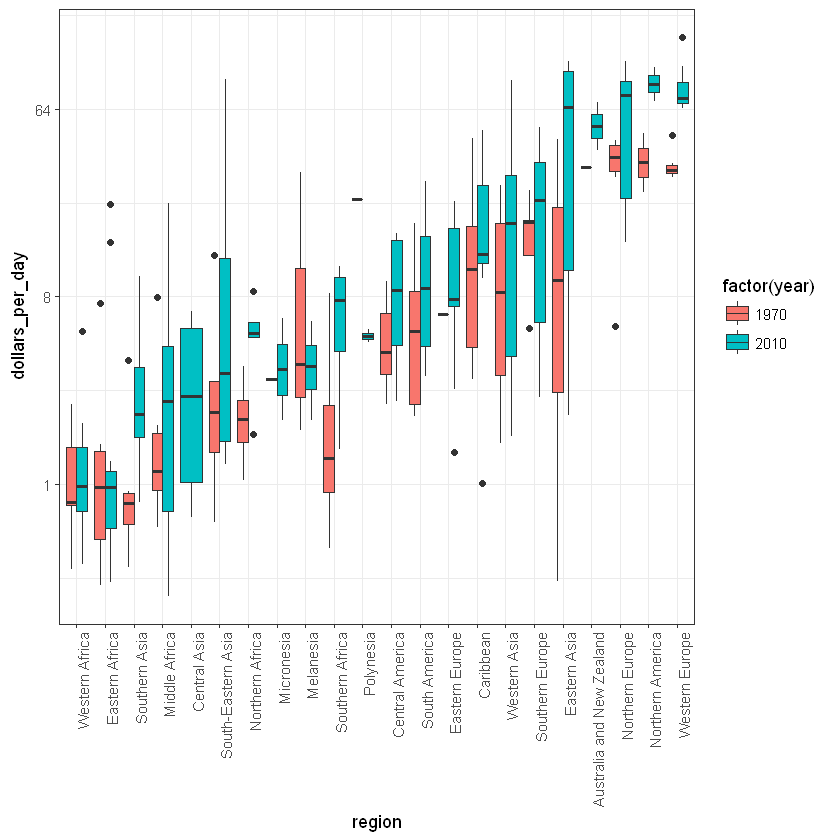

In [155]:
# Do the same comparison, but using boxplots
hist = gapminder %>% filter (year %in% c(1970, 2010) & !is.na(gdp))
hist = hist %>% mutate(region = reorder(region, dollars_per_day, FUN = median))
hist = hist %>% ggplot() + geom_boxplot(aes(region, dollars_per_day, fill = factor(year)))
hist = hist + theme(axis.text.x = element_text(hjust = 1, angle = 90))
hist = hist + scale_y_continuous(trans = "log2")
hist

## Smooth-Density Plots

Perform the same compariso using smooth-density curves.

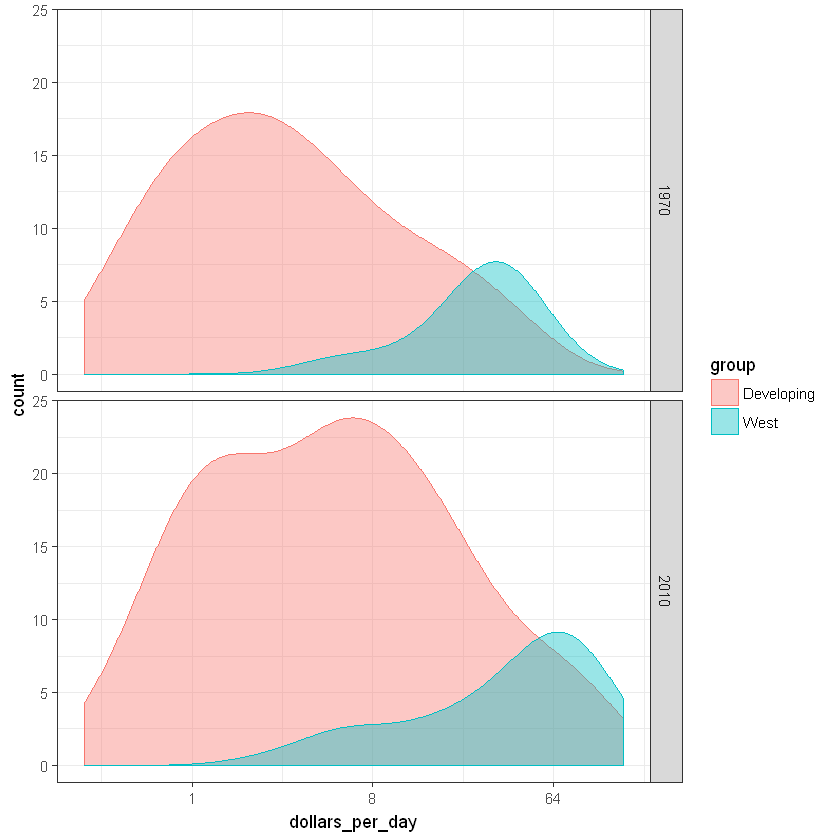

In [165]:
# Draw smooth density plots for gdp in 1970 and 2010

den = gapminder %>% filter(year %in% c(1970, 2010) & !is.na(gdp))
den = den %>% mutate(group = ifelse(region %in% west, "West", "Developing"))

# we want to show count instead of density on y-axis; to access count, use `..count..`
den = den %>% ggplot(aes(dollars_per_day, y = ..count.., fill = group, col=group)) 

den = den + scale_x_continuous(trans = "log2")
den = den + geom_density(alpha = 0.4, bw = 0.75) + facet_grid(year~.)
den

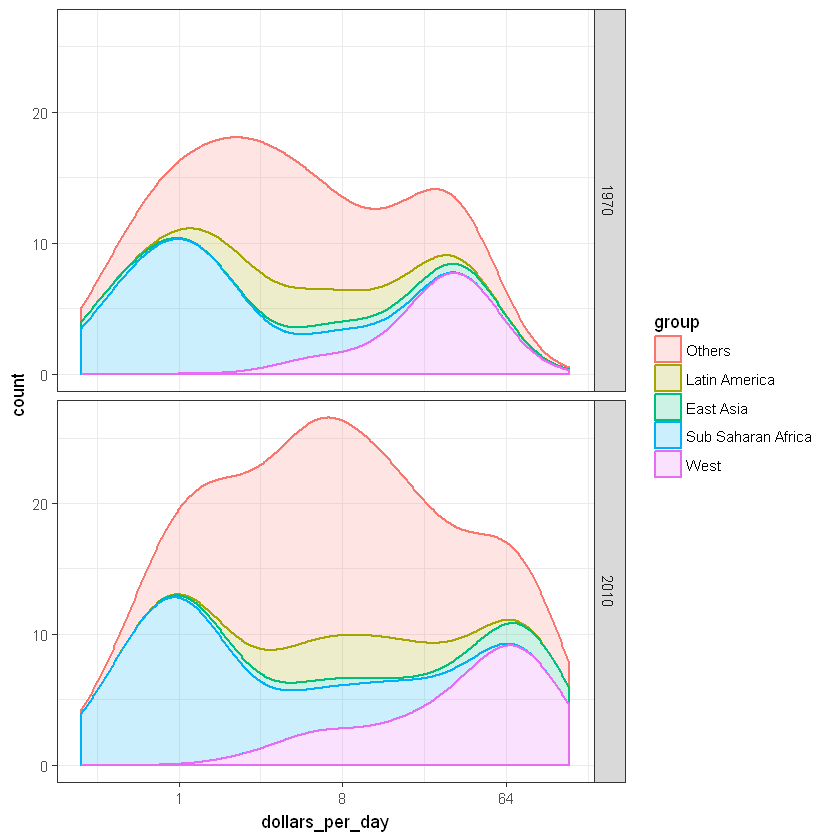

In [191]:
# Draw the smooth densities for each group
den = gapminder %>% filter (year %in% c(1970, 2010) & !is.na(gdp))

# add a group for the regions using case_when
den = den %>% mutate(group = case_when(
    .$region %in% west ~ "West",
    .$region %in% c("Eastern Asia", "South Eastern Asia") ~ "East Asia",
    .$region %in% c("Carrabean", "Eastern America", "South America") ~ "Latin America",
    .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub Saharan Africa",
    TRUE ~ "Others"
))

# convert this group into factor
den = den %>% mutate(group = factor(group, levels = c("Others", "Latin America", "East Asia", "Sub Saharan Africa", "West")))

# add the smooth density curve
den = den %>% ggplot(aes(dollars_per_day, y = ..count.., fill = group, col = group))
den = den + scale_x_continuous(trans = "log2")
den = den + geom_density(alpha = 0.2, bw = 0.75, size = 0.6, position = "stack") + facet_grid(year~.)

den

Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not ge

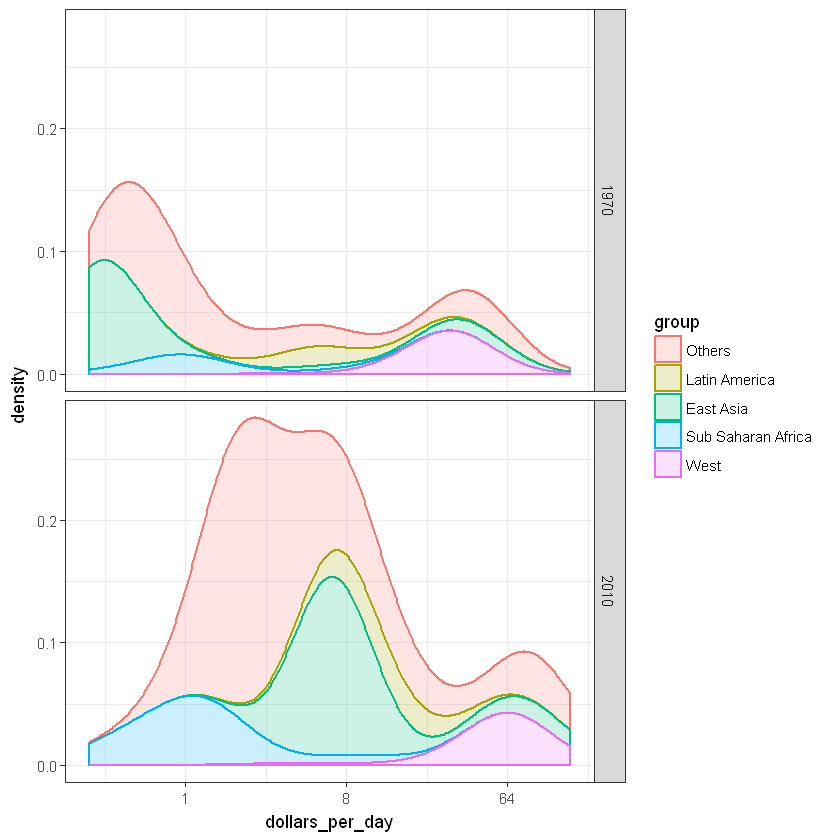

In [192]:
# Do the same graph, but w/ density on y-axis and weights for each region

# Draw the smooth densities for each group
den = gapminder %>% filter (year %in% c(1970, 2010) & !is.na(gdp))

# add a group for the regions using case_when
den = den %>% mutate(group = case_when(
    .$region %in% west ~ "West",
    .$region %in% c("Eastern Asia", "South Eastern Asia") ~ "East Asia",
    .$region %in% c("Carrabean", "Eastern America", "South America") ~ "Latin America",
    .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub Saharan Africa",
    TRUE ~ "Others"
))

# convert this group into factor
den = den %>% mutate(group = factor(group, levels = c("Others", "Latin America", "East Asia", "Sub Saharan Africa", "West")))

# assign a weight to each region
den = den %>% mutate (weight = population / sum(population) * 2)
# add the smooth density curve
den = den %>% ggplot(aes(dollars_per_day, fill = group, col = group, weight = weight))
den = den + scale_x_continuous(trans = "log2")
den = den + geom_density(alpha = 0.2, bw = 0.75, size = 0.6, position = "stack") + facet_grid(year~.)

den

The notebook ends here.